https://github.com/hpparvi/parviainen_2020_toi_519/blob/main/519/02a_m2_analysis.ipynb

In [6]:
import sys

sys.path.insert(0, "/raid_ut3/home/muscat/miniconda3/envs/m2pipeline/lib/python3.6/site-packages")

In [15]:
ls ./results/*.fits

./results/toi05956.01_230418_achromatic_k.fits
./results/toi05956.01_230418_chromatic_k.fits
./results/toi05956.01_230430_achromatic_k.fits
./results/toi05956.01_230430_chromatic_k.fits


In [16]:
from muscat2ta.m2mnlpf import M2MultiNightLPF

lpf = M2MultiNightLPF(target='toi05956.01_m2', 
#                       passbands=['r','i','z_s'],
                      use_opencl=True, 
                      with_transit=True, 
                      with_contamination=True, 
                      radius_ratio='chromatic',
                      noise_model='white',
                      datadir='./results/',
                      filename_pattern='*.fits',
                      klims=(0.01, 0.81),
                      contamination_model='physical',
#                       contamination_reference_passband='z_s',
                      use_linear_baseline_model=True
                      )
lpf.ps

[  0 |G| tc             N(μ = 0.0, σ = 0.1)                      [    -inf ..      inf],
   1 |G| p              N(μ = 1.0, σ = 1e-05)                    [    0.00 ..      inf],
   2 |G| rho            U(a = 0.1, b = 25.0)                     [    0.00 ..      inf],
   3 |G| b              U(a = 0.0, b = 1.0)                      [    0.00 ..     1.00],
   4 |P| k2_r           U(a = 2.5e-05, b = 0.0625)               [    0.00 ..     0.06],
   5 |P| k2_i           U(a = 2.5e-05, b = 0.0625)               [    0.00 ..     0.06],
   6 |P| k2_z_s         U(a = 2.5e-05, b = 0.0625)               [    0.00 ..     0.06],
   7 |G| cnt_ref        U(a = 0.0, b = 1.0)                      [    0.00 ..     1.00],
   8 |G| teff_h         U(a = 2500, b = 12000)                   [ 2500.00 .. 12000.00],
   9 |G| teff_c         U(a = 2500, b = 12000)                   [ 2500.00 .. 12000.00],
  10 |P| q1_r           U(a = 0, b = 1)                          [    0.00 ..     1.00],
  11 |P| q2_r        

In [3]:
lpf.set_prior('tc', 'NP', lpf.times[0].mean(),  0.05)
# lpf.set_prior('tc', 'NP', 2460065.6969450964, 0.018558399566264767)
lpf.set_prior('p', 'NP', 0.9291220, 0.0000093)
lpf.set_prior('k2_r', 'UP', 0.03, 0.1)
lpf.set_prior('k2_i', 'UP', 0.03, 0.1)
lpf.set_prior('k2_z_s', 'UP', 0.03, 0.1)
lpf.ps[3].bounds = (0, 1.5)
lpf.set_prior('b', 'UP', 0, 1.3)
# lpf.set_prior('rho', 'UP', 1, 50)
# ta.set_prior('q1_TESS', 'NP', 0.26, 0.01) #tess
# ta.set_prior('q2_TESS', 'NP', 0.26, 0.01)
# lpf.set_radius_ratio_prior(0.23, 0.35)
lpf.ps

[  0 |G| tc             N(μ = 2460053.6267563454, σ = 0.05)      [    -inf ..      inf],
   1 |G| p              N(μ = 0.929122, σ = 9.3e-06)             [    0.00 ..      inf],
   2 |G| rho            U(a = 0.1, b = 25.0)                     [    0.00 ..      inf],
   3 |G| b              U(a = 0, b = 1.3)                        [    0.00 ..     1.50],
   4 |P| k2_r           U(a = 0.03, b = 0.1)                     [    0.00 ..     0.06],
   5 |P| k2_i           U(a = 0.03, b = 0.1)                     [    0.00 ..     0.06],
   6 |P| k2_z_s         U(a = 0.03, b = 0.1)                     [    0.00 ..     0.06],
   7 |G| cnt_ref        U(a = 0.0, b = 1.0)                      [    0.00 ..     1.00],
   8 |G| teff_h         U(a = 2500, b = 12000)                   [ 2500.00 .. 12000.00],
   9 |G| teff_c         U(a = 2500, b = 12000)                   [ 2500.00 .. 12000.00],
  10 |P| q1_r           U(a = 0, b = 1)                          [    0.00 ..     1.00],
  11 |P| q2_r        

Global optimisation:   0%|          | 0/500 [00:00<?, ?it/s]

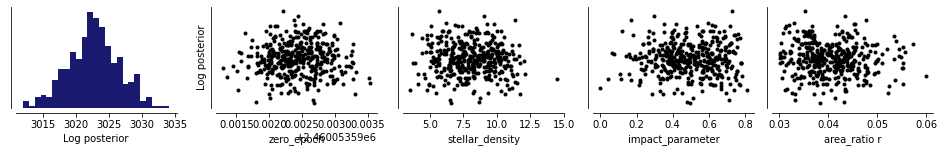

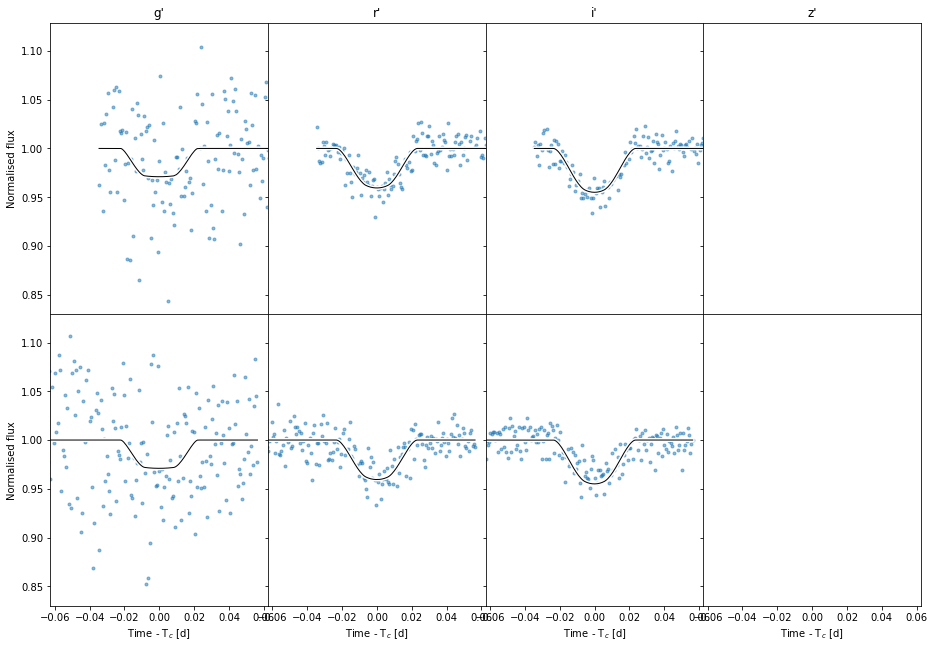

In [4]:
lpf.optimize_global(500, npop=400)
lpf.plot_light_curves(figsize=(13,9));

Global optimisation:   0%|          | 0/1500 [00:00<?, ?it/s]

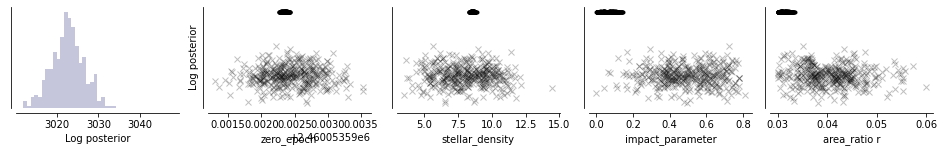

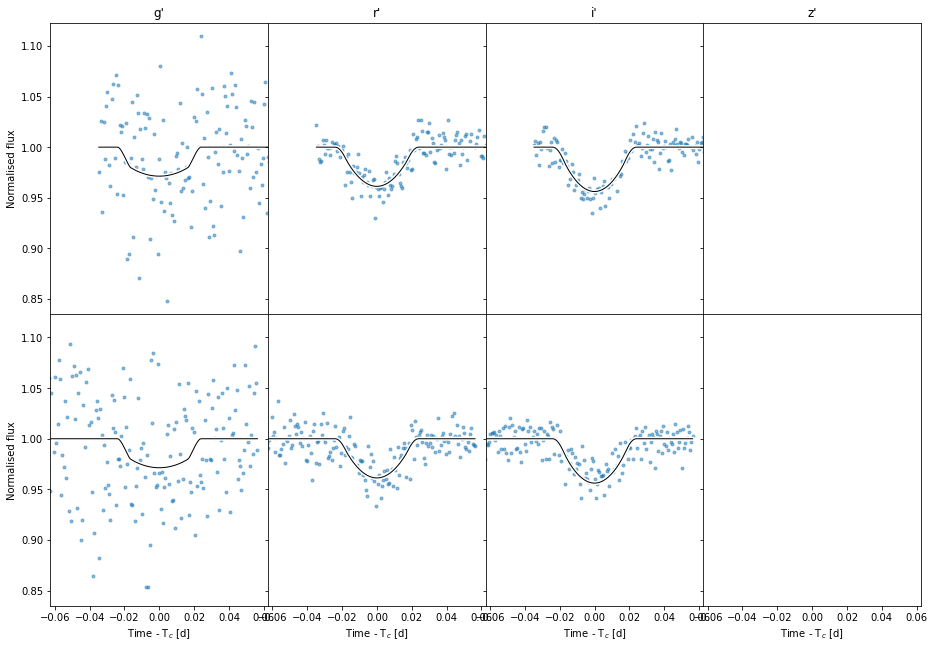

In [5]:
lpf.optimize_global(1500, npop=400)
lpf.plot_light_curves(figsize=(13,9));

In [6]:
lpf.sample_mcmc(3000, thin=10, repeats=2, save=False)

MCMC sampling:   0%|          | 0/2 [00:00<?, ?it/s]

Run 1/2:   0%|          | 0/3000 [00:00<?, ?it/s]

Run 2/2:   0%|          | 0/3000 [00:00<?, ?it/s]

In [ ]:
ax = lpf.plot_light_curves(figsize=(13,9));
ax.set_

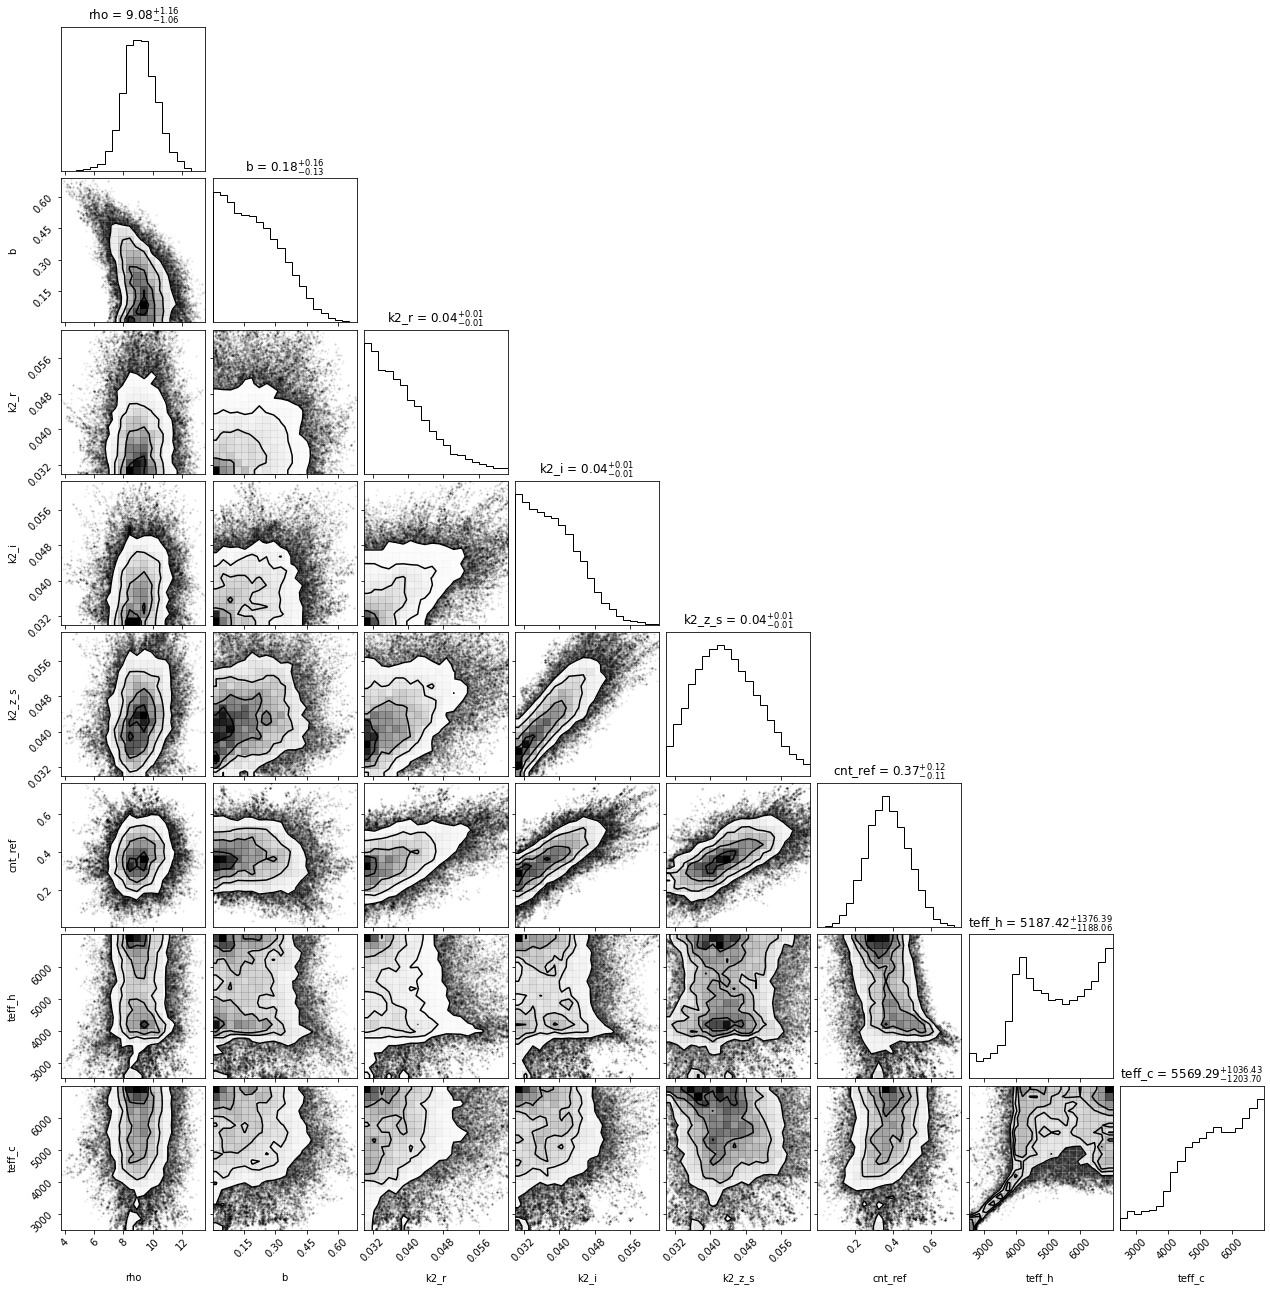

In [21]:
from corner import corner

n = 10
fc = lpf.sampler.flatchain
fc.shape
fig = corner(fc[:,2:n],
             labels=lpf.ps.names[2:n],
             show_titles=True,
             title_fmt='.2f'
            );

In [19]:
df = lpf.posterior_samples()

In [25]:
df.columns

Index(['tc', 'p', 'rho', 'b', 'k2_r', 'k2_i', 'k2_z_s', 'cnt_ref', 'teff_h',
       'teff_c', 'q1_r', 'q2_r', 'q1_i', 'q2_i', 'q1_z_s', 'q2_z_s',
       'wn_loge_0', 'wn_loge_1', 'wn_loge_2', 'wn_loge_3', 'wn_loge_4',
       'wn_loge_5', 'lm_i__0', 'lm_s__0_1', 'lm_s__0_2', 'lm_s__0_3',
       'lm_i__0', 'lm_s__0_1', 'lm_s__0_2', 'lm_s__0_3', 'lm_i__0',
       'lm_s__0_1', 'lm_s__0_2', 'lm_s__0_3', 'lm_i__0', 'lm_s__0_1',
       'lm_s__0_2', 'lm_s__0_3', 'lm_i__0', 'lm_s__0_1', 'lm_s__0_2',
       'lm_s__0_3', 'lm_i__0', 'lm_s__0_1', 'lm_s__0_2', 'lm_s__0_3', 'k_r',
       'k_i', 'k_z_s', 'a', 'inc', 't14', 't23'],
      dtype='object')

In [20]:
import seaborn as sb

df['k_app'] = sqrt(df.k2_app)
ax = sb.jointplot(df.k_app, df.k_true, kind='hex')

AttributeError: 'DataFrame' object has no attribute 'k_app'

In [ ]:
import numpy as np

np.sqrt(df.k2_app_tess).hist()

https://github.com/hpparvi/parviainen_2020_toi_519/blob/main/519/6a_analysis.ipynb

In [ ]:
from pytransit.contamination.plotting import joint_marginal_plot, plot_two_sided_kde, _jplot

In [ ]:
def joint_marginal_plot2(df, fw=10, nb=30, gs=25, **kwargs):
    return _jplot(df.k_true, df.teff_c, df.cnt, df.b, df.rho, fw, nb, gs, **kwargs)[0]

fig = joint_marginal_plot2(df, htelim=(0.288, 0.332), ctelim=(2500, 4500), rlim=(11,14), blim=(0.0, 0.32), clim=(0,0.22))
setp(fig.axes[0:2], xlabel='True radius ratio')
setp(fig.axes[0:2], xticks=(0.29, 0.31, 0.33))
ps = percentile(df.cnt, [60, 80, 90, 99])
[[ax.axhline(p, lw=1, ls=':') for p in ps] for ax in fig.axes[1:5]]
[fig.axes[1].text(0.29, p+0.01, '{:2d}%'.format(t), size='small') for p,t in zip(ps, [60, 80, 90, 99])]
setp(fig.axes[1], xticks=(0.29, 0.31, 0.33))
setp(fig.axes[3], xticks=(0.05, 0.16, 0.27))
setp(fig.axes[4], xticks=(11.5,12.5,13.5))

fig.axes[0].set_title('TOI 5956.01');
# fig.savefig('plots/toi_5956_01_contamination_posteriors.pdf')

In [ ]:
with sb.plotting_context('paper'):
    fig, axs = subplots(2, 1, figsize=(AAOCW,1.4*AAOCW))
    plot_two_sided_kde(df.k_app, df.k_true, clip=(0.279, 0.335), ax=axs[0])
    axs[0].text(-0.5, 0.335, 'Apparent', ha='center', va='top')
    axs[0].text( 0.5, 0.335, 'True', ha='center', va='top')
    setp(axs[0], xticks=[], ylabel='Radius ratio')

    plot_two_sided_kde(df.r_app, df.r_true, clip=(0.5, 1.6), bw=0.1, ax=axs[1])
    setp(axs[1], xticks=[], ylabel='Radius [R$_{\mathrm{Jup}}$]')
    axs[1].text(-0.5, 1.5, 'Apparent', ha='center', va='top')
    axs[1].text( 0.5, 1.5, 'True', ha='center', va='top')
    sb.despine(fig, offset=10)
    fig.tight_layout()

In [ ]:
with sb.plotting_context('paper'):
    fig, axs = subplots(2, 1, figsize=(AAOCW,1.4*AAOCW))
    plot_two_sided_kde(df.k_app, df.k_true, clip=(0.279, 0.335), ax=axs[0], bw=0.2)
    axs[0].text(-0.5, 0.335, 'Apparent', ha='center', va='top')
    axs[0].text( 0.5, 0.335, 'True', ha='center', va='top')
    setp(axs[0], xticks=[], ylabel='Radius ratio')

    plot_two_sided_kde(df.r_app_2, df.r_true_2, clip=(0.5, 1.6), bw=0.1, ax=axs[1])
    setp(axs[1], xticks=[], ylabel='Radius [R$_{\mathrm{Jup}}$]')
    axs[1].text(-0.5, 1.1, 'Apparent', ha='center', va='top')
    axs[1].text( 0.5, 1.1, 'True', ha='center', va='top')
    sb.despine(fig, offset=10)
    fig.tight_layout()